# Laboration 2 : Pichu or Pikachu

  - Read the data and store the appropriate data structure
  - Plotting all the points with different colors together
  - Read test points
  - Calculate distance between test point and other points
  - Classification of test points
  - Checking accuracy

#    Reading, cleaning and plotting the data

100


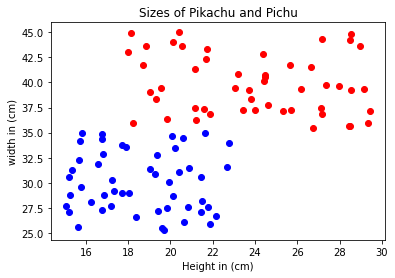

In [4]:
import matplotlib.pyplot as plt

def clean_data(file, pokemon_type): #creating a function to clean de data
    pokemon_list = [pokemon.strip("\n") for pokemon in file.readlines()] #Remove spaces  
    pokemon_list.remove("(width (cm), height (cm))") #remove the title
    pokemon_list = [pokemon.replace("(","").replace(")", "") for pokemon in pokemon_list] #replace parenthesis with ""
    pokemon_list = [pokemon.split(",") for pokemon in pokemon_list] #the string should be splitted into lists
    pokemon_list = [[float(pokemon[0]), float(pokemon[1]), pokemon_type] for pokemon in pokemon_list] #change elements to floats
    return pokemon_list

with open("files/pichu.txt", "r") as pichu, open("files/pikachu.txt", "r") as pikachu:
    pichu_list = clean_data(pichu, "pichu") #Reading, cleaning and joining the data
    pikachu_list = clean_data(pikachu, "pikachu") 
    Pokemons = pichu_list + pikachu_list
    print(len(Pokemons))

     
    pichu_width = [pichu[0] for pichu in pichu_list] #calling the first and second elements in order to create variables
    pichu_height = [pichu[1] for pichu in pichu_list] 
    pikachu_width = [pikachu[0] for pikachu in pikachu_list] 
    pikachu_height = [pikachu[1] for pikachu in pikachu_list]
    




# the type of plot is based on the link: https://dzone.com/articles/types-of-matplotlib-in-python
plt.scatter(pikachu_width,pikachu_height, label="pikachu",color="red")
plt.scatter(pichu_width,pichu_height,label="pichu",color="blue")
plt.title("Sizes of Pikachu and Pichu")
plt.xlabel("Height in (cm)")
plt.ylabel("width in (cm)")
plt.show()


#  Working on test points

- Reading and cleaning test points data

In [5]:
with open("files/test_points.txt", "r") as test:
    test_points = test.readlines() 
    test_points = test_points[0].split(")") 
    test_points = [point.replace(", (", "").replace("(", "") for point in test_points] 
    test_points = [point.split(",") for point in test_points] 
    del test_points[4] #remove element 4 (this is the last and empty element) from the list by specifying the position.
    test_points = [[float(point[0]), float(point[1])] for point in test_points]   
    print(test_points)

[[25.0, 35.0], [15.0, 14.0], [26.0, 30.0], [22.0, 45.0]]


- Plotting all points

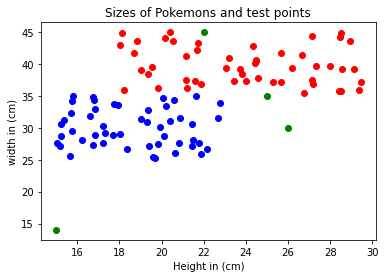

In [6]:
import matplotlib.pyplot as plt

points_list_width = [point[0] for point in test_points]
points_list_height = [point[1] for point in test_points]
plt.scatter(points_list_width, points_list_height, label="test points", color="green")
plt.scatter(pikachu_width,pikachu_height, label="pikachu",color="red")
plt.scatter(pichu_width,pichu_height,label="pichu",color="blue")
plt.title("Sizes of Pokemons and test points")
plt.xlabel("Height in (cm)")
plt.ylabel("width in (cm)")
plt.show()

- Calculating Euclidean distance and classification of test points based on the closest point

In [7]:
def euclidean(x1, y1, x2, y2): # creating function that calculates the euclidean distance between points.
    return ((x2 - x1)**2 + (y2-y1)**2)**0.5

def pichu_or_pikachu(test_point, data):#Based on the closest point, this function classifies the tested point as a Pichu or a Pikachu.
    #Create a list that contains the euclidean distance between the test point and a point in the data.
    distances = [[euclidean(test_point[0], test_point[1], point[0], point[1]), point[2]] for point in data] 
    distances.sort() #Sorts the list of distances by order
    if distances[0][1] == "pichu": #If the element 1 in the list is Pikachu. 
        print(f"Sample with (width, height): ({test_point[0]:.1f}, {test_point[1]:.1f}) is classified as Pichu.")
        return "pichu"
    else:
        print(f"Sample with (width, height): ({test_point[0]:.1f}, {test_point[1]:.1f}) is classified as Pikachu.")
        return "pikachu"
        
for point in test_points:
    pichu_or_pikachu(point, Pokemons)

Sample with (width, height): (25.0, 35.0) is classified as Pikachu.
Sample with (width, height): (15.0, 14.0) is classified as Pichu.
Sample with (width, height): (26.0, 30.0) is classified as Pichu.
Sample with (width, height): (22.0, 45.0) is classified as Pikachu.


#  Program making the user input a test point
 First, make sure the the user enter the right form 

In [27]:
while True:
    width = input("Enter the width of the pokemon please")
    height = input("Enter the height of the pokemon please")
    try: #vaules entered must be numeric and positive
        if width.isalpha() or height.isalpha(): # make sure to put a number. https://careerkarma.com/blog/python-isalpha-isnumeric-isalnum/
            raise ValueError ("You can only put numbers")
        width = float(width) 
        height = float(height)

        if width <= 0:
            raise ValueError ("width must be a positive number")
        elif height <= 0:
            raise ValueError ("height must be a positive number")
            
        list_of_sizes= [width, height]
        pichu_or_pikachu(list_of_sizes, Pokemons)
        break
    except ValueError as err:
        print(err)

You can only put numbers
width must be a positive number
Sample with (width, height): (30.0, 40.0) is classified as Pikachu.


# Classification based on five closest points

In [9]:
def pichu_or_pikachu_five(test_point, data): 
    # function that classifie the point tested if its pichu or pikachu based on the closest 5 points: 
    # if the 5 points are pichu so the tested point is pichu anf if the 5 points are pichu so the tested point is pichu.
    distances = [[euclidean(test_point[0], test_point[1], point[0], point[1]), point[2]] for point in data] 
    distances.sort()
    pokemons = [pokemon[1] for pokemon in distances[0:5]] #Adds the type of pokémon, for the five lowest values, to a list. https://stackoverflow.com/questions/509211/understanding-slice-notation
    pichu_count = pokemons.count("pichu") #Counts the number of the closest 5 pichus.
    pikachu_count = pokemons.count("pikachu") #Counts the number of the 5 closest pikachus.

    if pichu_count > pikachu_count: #If the five closest points contain more Pichus than Pikachus.
        print(f"Sample with (width, height): ({test_point[0]:.0f}, {test_point[1]:.0f}) is classified as Pichu.")
        return "pichu"
    else:
        print(f"Sample with (width, height): ({test_point[0]:.0f}, {test_point[1]:.0f}) is classified as Pikachu.")
        return "pikachu"

for point in test_points:
    pichu_or_pikachu_five(point, Pokemons)

Sample with (width, height): (25, 35) is classified as Pikachu.
Sample with (width, height): (15, 14) is classified as Pichu.
Sample with (width, height): (26, 30) is classified as Pichu.
Sample with (width, height): (22, 45) is classified as Pikachu.


# Calculating accuracy

In [33]:
import random as rnd
def random_data(data, size_test): # The function takes a data and the size of the test data as parameters.
    
    training_index = rnd.sample(range(len(data)), size_test) #Creates a sample 
    training = [(data[index]) for index in training_index] # choose elements in the data based on the random numbers. 

    testing_index = [number for number in range(len(data)) if number not in training_index]  
    #try it for numbers in the range and exclude the number that is not in the training_index. 
    testing = [(data[index]) for index in testing_index] 
    #the data points that are not part of the training data will be putted in a new data.

    return training, testing

In [36]:
def accuracy(training_data, test_data, function): 
    #The function picks a pokémon training data, a pokémon test data and a function.

    right_pichu, right_pikachu = [], []
    for actual_pokemon in test_data: 
        predicted_pokemon = function([actual_pokemon[0], actual_pokemon[1]], training_data) #activate the function
        if predicted_pokemon == "pikachu": #the function predicted pikachu
            if actual_pokemon[2] == predicted_pokemon: # if the actual pokémon is pikachu
                right_pikachu.append(True) #True positive
            else:
                right_pikachu.append(False) #False positive
        else: 
            if actual_pokemon[2] == predicted_pokemon: # if the actual pokémon is pichu
                right_pichu.append(True) #True negative
            else: 
                right_pichu.append(False) #False negative
                
    tp = right_pikachu.count(True)
    tn = right_pichu.count(True)
    fp = right_pikachu.count(False)
    fn = right_pichu.count(False) 
    
    accuracy = (tp + tn)/(tp + tn + fp + fn) 
    return accuracy

In [35]:
# try the test
pichu_training, pichu_testing = random_data(pichu_list, 45)
pikachu_training, pikachu_testing = random_data(pikachu_list, 45)

pokemon_training = pichu_training + pikachu_training #Create a list with the training data and a list with the testing data
pokemon_testing = pichu_testing + pikachu_testing

accuracy_point = accuracy(pokemon_training, pokemon_testing, pichu_or_pikachu)
print(f"The accuracy for the 'pichu_or_pikachu' function is {accuracy_point*100}%.")
accuracy_five_points = accuracy(pokemon_training, pokemon_testing, pichu_or_pikachu_five)
print(f"The accuracy for the 'pichu_or_pikachu_five' function is {accuracy_five_points*100}%.")

Sample with (width, height): (15.2, 27.1) is classified as Pichu.
Sample with (width, height): (17.2, 27.7) is classified as Pichu.
Sample with (width, height): (16.7, 34.9) is classified as Pichu.
Sample with (width, height): (21.6, 35.0) is classified as Pichu.
Sample with (width, height): (15.6, 25.6) is classified as Pichu.
Sample with (width, height): (27.2, 44.4) is classified as Pikachu.
Sample with (width, height): (24.5, 40.7) is classified as Pikachu.
Sample with (width, height): (28.5, 39.2) is classified as Pikachu.
Sample with (width, height): (18.7, 41.7) is classified as Pikachu.
Sample with (width, height): (20.5, 43.6) is classified as Pikachu.
The accuracy for the 'pichu_or_pikachu' function is 100.0%.
Sample with (width, height): (15, 27) is classified as Pichu.
Sample with (width, height): (17, 28) is classified as Pichu.
Sample with (width, height): (17, 35) is classified as Pichu.
Sample with (width, height): (22, 35) is classified as Pichu.
Sample with (width, he